In [1]:
import pandas as pd
import Utils
import Preprocess
import RetrievalMethods

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/apostolos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Read Data - Preprocessing - Statistics Extraction

In [2]:
passage_collection_file = '../dataset/passage_collection_new.txt'
test_queries_file = '../dataset/test-queries.tsv'
candidate_passages_top1000_file = '../dataset/candidate_passages_top1000.tsv'

In [3]:
passage_collection = Utils.read_collection(passage_collection_file)

In [4]:
### preprocess the passage sentences
preprocessed_passages = Preprocess.process_data(passage_collection,lemm = False)

In [5]:
print(preprocessed_passages[0:3])

[['this', 'is', 'the', 'definition', 'of', 'rna', 'along', 'with', 'examples', 'of', 'types', 'of', 'rna', 'molecules', 'this', 'is', 'the', 'definition', 'of', 'rna', 'along', 'with', 'examples', 'of', 'types', 'of', 'rna', 'molecules', 'rna', 'definition'], ['best', 'answer', 'the', 'ar', 'designation', 'comes', 'from', 'the', 'name', 'of', 'the', 'company', 'that', 'produced', 'the', 'firearm', 'armalite', 'it', 'is', 'a', 'common', 'misconception', 'that', 'it', 'stands', 'for', 'assault', 'rifle', 'from', 'wikipedia', 'the', 'ar', 'is', 'based', 'on', 'the', 'ar', 'designed', 'by', 'eugene', 'stoner', 'of', 'the', 'fairchild', 'armalite', 'corporation'], ['what', 'does', 'ar', 'really', 'mean', 'posted', 'by', 'quality', 'ar', 'barrels', 'jul', 'ar', 'articles', 'over', 'the', 'years', 'the', 'media', 'has', 'programmed', 'the', 'public', 'into', 'thinking', 'that', 'ar', 'stands', 'for', 'assault', 'rifle', 'this', 'is', 'not', 'the', 'case', 'to', 'follow', 'is', 'a', 'short', '

In [6]:
## find the frquency of each word on th passage collection
ordered_term_frequency_dictionary,total_words = Utils.derive_frequencies_from_collection(preprocessed_passages)

In [7]:
ordered_term_frequency_dictionary

[('the', 626892),
 ('of', 334283),
 ('a', 283558),
 ('and', 255211),
 ('to', 240943),
 ('is', 216851),
 ('in', 202175),
 ('for', 108167),
 ('or', 86924),
 ('you', 86652),
 ('that', 81084),
 ('are', 77176),
 ('it', 69548),
 ('on', 68236),
 ('as', 67752),
 ('your', 61565),
 ('with', 59497),
 ('s', 56348),
 ('by', 52045),
 ('an', 50108),
 ('can', 49971),
 ('be', 49110),
 ('from', 47956),
 ('this', 43533),
 ('at', 39432),
 ('have', 33377),
 ('not', 31856),
 ('if', 30447),
 ('will', 27760),
 ('one', 27299),
 ('was', 27110),
 ('which', 25851),
 ('name', 25102),
 ('i', 23897),
 ('more', 23607),
 ('has', 23295),
 ('also', 21757),
 ('but', 21569),
 ('when', 21533),
 ('number', 21351),
 ('all', 20578),
 ('may', 20556),
 ('other', 19958),
 ('most', 19822),
 ('about', 18979),
 ('they', 18620),
 ('there', 17480),
 ('cost', 17128),
 ('how', 16568),
 ('used', 16542),
 ('than', 16226),
 ('first', 16111),
 ('what', 15968),
 ('blood', 15117),
 ('up', 14957),
 ('time', 14887),
 ('meaning', 14488),
 ('t',

R^2 coefficient is: 0.9802614091428827
Linear Model Weight: -1.6775353220707623
Linear Model Bias: 3.1709651078270014


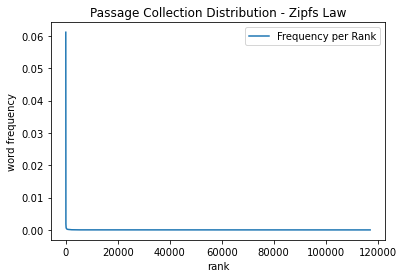

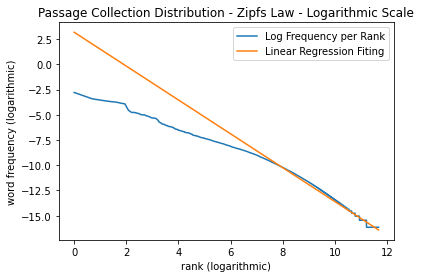

Mean Value: 0.0237230182789
Std: 0.02435791753664365


In [8]:
Utils.plot_word_frequencies(ordered_term_frequency_dictionary,total_words)

## Read the remaining data

In [9]:
colnames_test_queries=['qid','query']
test_queries_init=pd.read_csv(test_queries_file, sep='\t', header=None,names=colnames_test_queries)
test_queries_df=pd.DataFrame(test_queries_init)

colnames_candidate_passages=['qid','pid','query','passage']
candidate_passages_top_1000_init=pd.read_csv(candidate_passages_top1000_file,sep='\t',header=None,names=colnames_candidate_passages)
candidate_passages_top1000_df=pd.DataFrame(candidate_passages_top_1000_init)

## Retrieval Models and Experiments

In [10]:
## create dictionaries with the data_given
test_queries_dict, passages_dict, query_passage_dict = Utils.get_dictionaries(candidate_passages_top1000_df,test_queries_df)

In [11]:
print(len(query_passage_dict.get('all_query')))
print(query_passage_dict.get('all_query'))

182469
[7130104, 7130335, 7130336, 7130348, 8001869, 8001870, 7130674, 7130867, 8002085, 7131236, 7131238, 7131240, 7131241, 7131242, 7131322, 8002670, 8002855, 8003157, 7131638, 8003310, 8003320, 7131647, 8003559, 7132190, 7132338, 7132810, 7132942, 7133139, 7133141, 7133256, 7133282, 8003745, 8003753, 8003756, 8003763, 8003846, 8003925, 713369, 713370, 8003993, 7133739, 7133740, 7133790, 7133847, 8004107, 8004162, 8004227, 7134595, 7134596, 8004290, 7134879, 7134939, 8004831, 7135041, 8004928, 7135097, 8004958, 8005090, 7135553, 7135558, 8005683, 8005808, 7135868, 7135939, 8006856, 8006894, 8007022, 8007563, 8007629, 8007799, 8007908, 8007989, 840116, 8401268, 8401274, 8402036, 8402131, 8402777, 8402859, 8402958, 8402968, 84034, 8403429, 8403443, 840379, 8403978, 8404290, 840451, 8404708, 8404887, 8404962, 8405063, 8405147, 8405240, 8405332, 8405390, 8405524, 8405594, 8405601, 840571, 8405723, 8405726, 8405729, 840578, 8405875, 8405876, 8405980, 8405982, 8406021, 8406241, 8406244, 84

In [12]:
candidate_passages_top1000_df.loc[candidate_passages_top1000_df['qid'] == 1112389]

,qid,pid,query,passage
549,1112389,8425082,"what is the county for grand rapids, mn","Shellsburg, Iowa is located a short distance w..."
657,1112389,8429763,"what is the county for grand rapids, mn",By Rachel Smith. @Rachel71. This recipe comes ...
929,1112389,7176887,"what is the county for grand rapids, mn","Fowling is coming to the Grand Rapids area, bu..."
1127,1112389,5192857,"what is the county for grand rapids, mn","Thank you! By submitting your email address, y..."
1142,1112389,7188591,"what is the county for grand rapids, mn",Network; Plans; Priority Health Services is no...
...,...,...,...,...
188860,1112389,7936682,"what is the county for grand rapids, mn",Why Grand Rapids is Beer City USA Grand Rapids...
189148,1112389,4689180,"what is the county for grand rapids, mn",Running the Colorado River through the Grand C...
189214,1112389,838657,"what is the county for grand rapids, mn",Walker born and raised! What with the miles of...
189243,1112389,7958248,"what is the county for grand rapids, mn",I have an antique desk made by H.E Shaw furnit...


In [13]:
candidate_passages_top1000_df

,qid,pid,query,passage
0,494835,7130104,"sensibilities, definition",This is the definition of RNA along with examp...
1,1128373,7130104,iur definition,This is the definition of RNA along with examp...
2,131843,7130104,definition of a sigmet,This is the definition of RNA along with examp...
3,20455,7130335,ar glasses definition,Best Answer: The AR designation comes from the...
4,719381,7130335,what is ar balance,Best Answer: The AR designation comes from the...
...,...,...,...,...
189872,1056204,79980,who was the first steam boat operator,Other operators with special formats accept mo...
189873,1132213,7998257,how long to hold bow in yoga,You may be surprised that to learn that yoga t...
189874,324211,7998651,how much money a united airline get as a capta...,Find cheap airline tickets & deals on flights ...
189875,1116341,7998709,closed ended mortgage definition,"What is a wrap-around mortgage, and who is it ..."


In [14]:
test_queries_dict.get(1112389)

'what is the county for grand rapids, mn'

In [15]:
print(len(query_passage_dict.get(1112389)))

1000


In [16]:
## preprocess the query
preprocessed_queries_dict = Utils.preprocess_queries(test_queries_dict)

In [17]:
preprocessed_queries_dict.get(1112389)

['counti', 'grand', 'rapid', 'mn']

In [18]:
preprocessed_passages, passage_ids, preprocessed_candidates_dict = Utils.preprocess_passages(1112389,passages_dict,query_passage_dict,'query')

In [19]:
print(len(preprocessed_passages))
print((len(preprocessed_candidates_dict)))
print(preprocessed_passages[0:2])

1000
1000
[['shellsburg', 'iowa', 'locat', 'short', 'distanc', 'west', 'cedar', 'rapid', 'benton', 'counti', 'peopl', 'like', 'peopl', 'follow'], ['rachel', 'smith', 'recip', 'come', 'restaur', 'coon', 'rapid', 'mn', 'salad', 'salad', 'signatur', 'salad', 'amaz', 'thought', 'would', 'share', 'recip', 'believ', 'tri', 'make', 'ingredi']]


In [20]:
passage_ids[0:2]

[8425082, 8429763]

In [21]:
preprocessed_candidates_dict

{8425082: ['shellsburg',
  'iowa',
  'locat',
  'short',
  'distanc',
  'west',
  'cedar',
  'rapid',
  'benton',
  'counti',
  'peopl',
  'like',
  'peopl',
  'follow'],
 8429763: ['rachel',
  'smith',
  'recip',
  'come',
  'restaur',
  'coon',
  'rapid',
  'mn',
  'salad',
  'salad',
  'signatur',
  'salad',
  'amaz',
  'thought',
  'would',
  'share',
  'recip',
  'believ',
  'tri',
  'make',
  'ingredi'],
 7176887: ['fowl',
  'come',
  'grand',
  'rapid',
  'area',
  'everyon',
  'happi',
  'cascad',
  'township',
  'mi',
  'popular',
  'hybrid',
  'sport',
  'found',
  'hamtramck',
  'warehous',
  'fowl',
  'make',
  'move',
  'west',
  'michigan',
  'neighbor',
  'pleas'],
 5192857: ['thank',
  'submit',
  'email',
  'address',
  'understand',
  'receiv',
  'email',
  'commun',
  'bibl',
  'gateway',
  'divis',
  'zondervan',
  'corpor',
  'spark',
  'drive',
  'se',
  'grand',
  'rapid',
  'mi',
  'usa',
  'includ',
  'commerci',
  'commun',
  'messag',
  'partner',
  'bibl',
 

In [22]:
inverted_index, index_token_dictionary = Utils.inverted_index(preprocessed_passages,passage_ids)

In [23]:
print(index_token_dictionary)

{'shellsburg': 0, 'iowa': 1, 'locat': 2, 'short': 3, 'distanc': 4, 'west': 5, 'cedar': 6, 'rapid': 7, 'benton': 8, 'counti': 9, 'peopl': 10, 'like': 11, 'follow': 12, 'rachel': 13, 'smith': 14, 'recip': 15, 'come': 16, 'restaur': 17, 'coon': 18, 'mn': 19, 'salad': 20, 'signatur': 21, 'amaz': 22, 'thought': 23, 'would': 24, 'share': 25, 'believ': 26, 'tri': 27, 'make': 28, 'ingredi': 29, 'fowl': 30, 'grand': 31, 'area': 32, 'everyon': 33, 'happi': 34, 'cascad': 35, 'township': 36, 'mi': 37, 'popular': 38, 'hybrid': 39, 'sport': 40, 'found': 41, 'hamtramck': 42, 'warehous': 43, 'move': 44, 'michigan': 45, 'neighbor': 46, 'pleas': 47, 'thank': 48, 'submit': 49, 'email': 50, 'address': 51, 'understand': 52, 'receiv': 53, 'commun': 54, 'bibl': 55, 'gateway': 56, 'divis': 57, 'zondervan': 58, 'corpor': 59, 'spark': 60, 'drive': 61, 'se': 62, 'usa': 63, 'includ': 64, 'commerci': 65, 'messag': 66, 'partner': 67, 'hank': 68, 'network': 69, 'plan': 70, 'prioriti': 71, 'health': 72, 'servic': 73,

In [24]:
print(inverted_index)

{'shellsburg': {8425082: 1}, 'iowa': {8425082: 1, 1690911: 2, 281773: 1, 1917156: 3, 213302: 3, 2146077: 2, 1690909: 2, 1690914: 2, 6199120: 1, 1241172: 2, 1390157: 3, 3702304: 1, 6199114: 1, 2068885: 1, 4520203: 1}, 'locat': {8425082: 1, 8501535: 1, 814747: 1, 8178506: 2, 5340373: 3, 5382198: 1, 7417864: 2, 8341440: 1, 877353: 1, 1422900: 1, 1429212: 1, 5984843: 1, 5992574: 1, 6064419: 4, 6064420: 4, 6221200: 1, 1690911: 1, 3146289: 1, 3146293: 1, 2436039: 1, 3345028: 1, 3394193: 1, 3445871: 1, 3454424: 2, 1015764: 1, 7198424: 1, 7198431: 2, 7651153: 1, 7296920: 1, 1184965: 1, 1213306: 1, 7784504: 1, 7400877: 1, 7442929: 1, 7524966: 1, 2633766: 3, 2665024: 2, 285724: 1, 3699518: 2, 2472199: 1, 2472200: 1, 37682: 2, 7651157: 1, 7651158: 1, 1917156: 1, 7743807: 1, 7756076: 2, 7756079: 1, 2026609: 1, 2050726: 1, 212588: 2, 7909647: 1, 2140793: 1, 2140801: 1, 2157726: 1, 1621120: 1, 1709038: 1, 1690914: 1, 1709039: 1, 5974816: 1, 5984721: 1, 1007620: 2, 4340981: 1, 8486309: 1, 8487540: 1,

In [47]:
RetrievalMethods.Retrieval_Pipeline(preprocessed_queries_dict,passages_dict,query_passage_dict,'LM-Lindstone',0.5)

In [46]:
passages_dict.get(1782963)

'The interface between the RNC and the Circuit Switched Core Network (CS-CN) is called Iu-CS and between the RNC and the Packet Switched Core Network is called Iu-PS. Other interfaces include Iub (between the RNC and the Node B) and Iur (between RNCs in the same network). Control plane protocol for the transport layer is called ALCAP (A ccess L ink C ontrol A pplication P rotocol). 2  Basic functionality of ALCAP is multiplexing of different users onto one AAL2 transmission path using channel IDs (CIDs).'

In [41]:
test_queries_dict.get(1128373)

'iur definition'